In [86]:
#importing require libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [58]:
#loading the data set (boston house prices)
house_price_pre = pd.read_csv('https://github.com/YBIFoundation/Dataset/raw/main/Boston.csv')


In [59]:
#changing the name of the column MEDV to prices for better understanding
house_price_pre.rename(columns={'MEDV': 'PRICES'}, inplace=True)

In [60]:
house_price_pre.shape

(506, 14)

In [61]:
house_price_pre.head()

,CRIM,ZN,INDUS,CHAS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICES
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [62]:
house_price_pre.tail()

,CRIM,ZN,INDUS,CHAS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICES
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273.0,21.0,396.90,7.88,11.9


In [63]:
house_price_pre.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NX         0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICES     0
dtype: int64

In [64]:
house_price_pre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NX       506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICES   506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [65]:
house_price_pre.describe()

,CRIM,ZN,INDUS,CHAS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICES
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


intialising the columns to X and Y

In [66]:
X = house_price_pre[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT']]

Y = house_price_pre['PRICES']


In [67]:
print(X)

        CRIM    ZN  INDUS  CHAS     NX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273.0   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273.0   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273.0   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273.0   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273.0   

     PTRATIO       B  LSTAT  
0       15.3  396.90   4.98  
1       17.8  396.90   9.14  
2       1

In [68]:
print(Y)

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: PRICES, Length: 506, dtype: float64


splitting the data

In [69]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2, random_state=2)

In [70]:
print(X.shape,X_train.shape,X_test.shape,Y.shape,Y_train.shape,Y_test.shape)

(506, 13) (404, 13) (102, 13) (506,) (404,) (102,)


Implementing  the model

In [71]:
model = LinearRegression()

In [72]:
model.fit(X_train,Y_train)

LinearRegression()

In [73]:
#predicting from the training data
training_prediction = model.predict(X_train)

In [74]:
print(training_prediction)

[25.01156658 23.20086342 19.63206629 30.79723661 13.29598163 12.35655178
 21.17619058 11.52105413 13.48284934 23.29619143 16.67181245 11.9640623
 32.53526883 25.38737924 29.80188665 19.51269487 24.14966495 24.10079632
 30.6933436  19.14366521 33.53309203  3.93459665 41.11203484 24.48533152
 20.09948308 23.54618062 21.50057915 25.02443747 22.39275602 33.67942244
 25.49286716  8.07877994 17.45164918 10.02711469 20.30483806 12.97802751
 18.36662544 25.4320083  14.00655745 17.89557148 24.77620977 28.90131112
 17.27439484 23.1865498  12.62489379 11.32274928 27.4978866  19.49269776
 44.80229099 16.9529603  22.44602306 33.66680303 20.2706101  20.70205114
 20.98558754 21.63228494 27.05322369 33.11940621 25.61757987 32.73314444
 20.91920151 41.11899411 15.32086807  8.42394611 22.84480968 13.72210624
 28.60744627 17.09291577 26.76454185 39.14699941 34.90240572 35.55989745
 21.98217997 28.96612576 25.11129326 42.52704888 19.53053513 22.63970213
 17.14416523 27.37214688 33.68385271 25.77228001 26.

In [75]:
#to know the difference between actual values and predicted values let us perform r square and mean square
difference = metrics.r2_score(Y_train,training_prediction)

In [76]:
print(difference)

0.7285831776605591


In [77]:
difference_1 = metrics.mean_squared_error(Y_train,training_prediction)

In [78]:
print(difference_1)

22.95369357611288


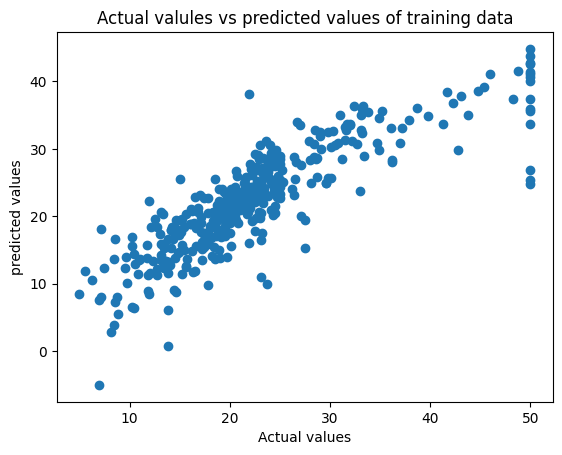

In [87]:
#plotting the difference in the graph of training data
plt.scatter(Y_train,training_prediction)
plt.xlabel('Actual values')
plt.ylabel('predicted values')
plt.title('Actual valules vs predicted values of training data')
plt.show()

Testing data prediciton

In [79]:
testing_prediction = model.predict(X_test)

In [80]:
print(testing_prediction)

[23.01506153 21.2115869  33.71590384 31.56542369  3.1826268   3.15381954
 27.40305304 22.2126176  14.86506114 21.34105453 30.95942941 26.70065029
 21.12624382 18.37282564 17.64315354 25.38194186 24.42970445 13.36957057
  8.66686786 18.57490534 21.73966467 20.34270529 36.5461105  20.59627495
 19.87979627 15.75766967 37.11632999 34.85897895 30.83458635 23.23441285
 18.68278505 20.749546   31.84560076 30.20214207 13.3861702  15.87078398
 13.70766096 23.74163998 25.95135088 23.18325878 28.99906539 12.50341936
 31.08347911  6.39401895 23.71801218 20.61523929 33.15362417 19.21862493
 35.89603081  0.82365329 31.90288611 31.69640543  6.58849712 34.62762996
 20.41162545 19.69277608 19.53445865 18.58689088 15.81420496 22.98764309
 19.65947045 16.36377019 18.48783369 32.76568172 35.49022568 24.58349631
 41.5854766  32.94818456 14.60990256 27.43178268  8.04470074  5.61185652
 22.21428332 18.72817007 31.02824788 26.04494485 24.60357003 24.84231113
 25.38796252 24.87762205 33.71343923 19.72606026 20

In [81]:
difference_2 = metrics.r2_score(Y_test,testing_prediction)

In [82]:
print(difference_2)

0.7789207451814407


In [84]:
difference_3 = metrics.mean_squared_error(Y_test,testing_prediction)

In [85]:
print(difference_3)

18.495420122448486


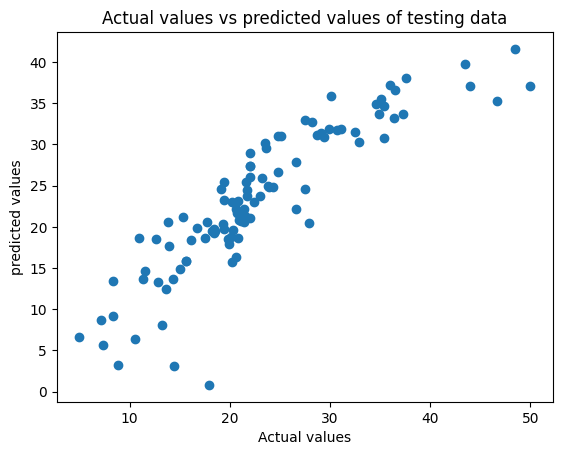

In [88]:
plt.scatter(Y_test,testing_prediction)
plt.xlabel('Actual values')
plt.ylabel('predicted values')
plt.title('Actual values vs predicted values of testing data')
plt.show()